(The data can be downloaded here: https://drive.google.com/file/d/1GM7YQ1oPwr2NrjFxqB9KR4cscSmX779x/view?usp=share_link)
      
## Importing Python Libraries

In [21]:
%matplotlib inline
import matplotlib.pylab as plt

import cv2
import PIL.Image as Image

import numpy as  np
import torch as t
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
import tqdm
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
'''
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 
'''


'\nfrom tensorflow.keras.models import Model \nfrom tensorflow.keras.layers import Dense, Activation,Input \n'

##  Load dogs dataset

In [22]:
data_dir = 'C:\\Users\\remem\\OneDrive\\Documents\\Classwork\\P2_AI\\Data\\dogs'
print(data_dir)

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
print(type(data_dir))

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

C:\Users\remem\OneDrive\Documents\Classwork\P2_AI\Data\dogs
<class 'pathlib.WindowsPath'>
577


In [23]:
# Create the dictionary for the dog images
# Include your solution below

dogs_images_dict = {
    'beagle': list(data_dir.glob('beagle/*')),
    'bedlington_terrier': list(data_dir.glob('bedlington_terrier/*')),
    'pug': list(data_dir.glob('pug/*')),
}

In [24]:
dogs_labels_dict = {
    'beagle': 0,
    'bedlington_terrier': 1,
    'pug': 2,
}

In [25]:
X, y = [], []

for dog_name, images in dogs_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(dogs_labels_dict[dog_name])

In [26]:
X = np.array(X)
y = np.array(y)

## Train test split

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

# Representing Labels using one-hot-encoding

In [28]:
k = np.unique(y).size
Y_oh_train = to_categorical(y_train, k)
Y_oh_val = to_categorical(y_val, k)
Y_oh_test = to_categorical(y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

'''
k = np.unique(y).size

Y_oh_train = to_categorical(y_train, k) 
Y_oh_val = to_categorical(y_val, k) 
Y_oh_test = to_categorical(y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])
'''

Y_train[:5]:
[1 0 0 0 1]

Y_oh_train[:5]=
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


"\nk = np.unique(y).size\n\nY_oh_train = to_categorical(y_train, k) \nY_oh_val = to_categorical(y_val, k) \nY_oh_test = to_categorical(y_test, k)\n# Displaying the 5 first elemnts\nprint('Y_train[:5]:')\nprint(y_train[:5])\nprint('\nY_oh_train[:5]=')\nprint(Y_oh_train[:5])\n"

## Preprocessing: scale images

In [29]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

X_train_scaled = t.tensor(X_train_scaled, dtype=t.float32)
X_test_scaled = t.tensor(X_test_scaled, dtype=t.float32)

y_train_fixed = t.tensor(Y_oh_train, dtype=t.float32)
y_test_fixed = t.tensor(Y_oh_test, dtype=t.float32)

## Task 1: develop a Fully Connected Neural Network and train & test the dogs data

In [30]:
# you must create a fully connected neural network model with 5 layers: 
# 1 input layer, 4 hidden layers(more than 20 neurons for each layer), 1 output layer 
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(224 * 224 * 3, 30),
            nn.ReLU(),
            nn.Linear(30, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Linear(20, 20),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(20, 3),
            nn.Softmax()
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        #makes a copy so that it doesn't change x
        logits = self.linear_relu_stack(x)
        return logits

'''
def my_FullyConnectedModel(my_shape=(224,224,3), k=3, lr=0.15):
    #include your solution below
    
    inputs = Input(shape=my_shape)
    hidden1 = Dense(30, activation='relu')(inputs)
    hidden2 = Dense(20, activation='relu')(hidden1)
    hidden3 = Dense(20, activation='relu')(hidden2)
    hidden4 = Dense(20, activation='relu')(hidden3)
    flat = tf.keras.layers.Flatten()(hidden4)
    out1 = Dense(k, activation='softmax')(flat)
    model = Model(inputs=inputs, outputs=out1)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
    
    return model  
'''



'\ndef my_FullyConnectedModel(my_shape=(224,224,3), k=3, lr=0.15):\n    #include your solution below\n    \n    inputs = Input(shape=my_shape)\n    hidden1 = Dense(30, activation=\'relu\')(inputs)\n    hidden2 = Dense(20, activation=\'relu\')(hidden1)\n    hidden3 = Dense(20, activation=\'relu\')(hidden2)\n    hidden4 = Dense(20, activation=\'relu\')(hidden3)\n    flat = tf.keras.layers.Flatten()(hidden4)\n    out1 = Dense(k, activation=\'softmax\')(flat)\n    model = Model(inputs=inputs, outputs=out1)\n    \n    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])\n    \n    return model  \n'

In [31]:
model = NeuralNetwork()
print(model)

'''
model = my_FullyConnectedModel()
print(model.summary())
'''

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=150528, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=20, bias=True)
    (5): ReLU()
    (6): Linear(in_features=20, out_features=20, bias=True)
    (7): ReLU()
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(in_features=20, out_features=3, bias=True)
    (10): Softmax(dim=None)
  )
)


'\nmodel = my_FullyConnectedModel()\nprint(model.summary())\n'

In [32]:
# Include your solution below
epochs = 20
loss_function = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model.parameters(), lr=0.15)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_scaled)
    loss = loss_function(y_pred, t.argmax(y_train_fixed, dim=1))
    loss.backward()
    optimizer.step()
    # evaluate model at end of epoch

model.eval()
with t.no_grad():
    output = model(X_test_scaled)
    #the first value is not needed
    _, predict = t.max(output,1)
    c = (predict == t.argmax(y_test_fixed,dim=1)).sum().item()
    acc = c/len(y_test_fixed)
    print(f"Accuracy {acc}")

'''
my_batch_size = 50
my_epochs = 20

history = model.fit(X_train_scaled, Y_oh_train, validation_data=(X_val_scaled,Y_oh_val), \
                    batch_size=my_batch_size, epochs=my_epochs,verbose=1)
'''

Accuracy 0.3017241379310345


'\nmy_batch_size = 50\nmy_epochs = 20\n\nhistory = model.fit(X_train_scaled, Y_oh_train, validation_data=(X_val_scaled,Y_oh_val),                     batch_size=my_batch_size, epochs=my_epochs,verbose=1)\n'

In [33]:
#Printed above when we evalueate the epochs!!

'''
test_accuracy = model.evaluate(X_test_scaled,Y_oh_test)
print(test_accuracy)
'''

'\ntest_accuracy = model.evaluate(X_test_scaled,Y_oh_test)\nprint(test_accuracy)\n'

torch.Size([1, 224, 224, 3])


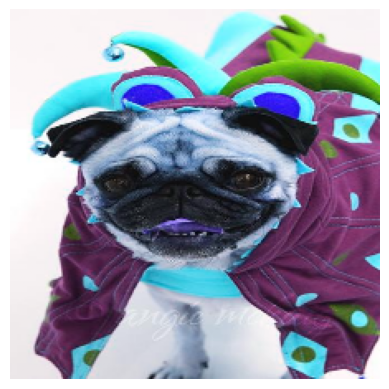

In [34]:
# choose an image from the testing dataset for testing, for example X_test_scaled[10] 
# you can try other images if you want by changing the index of X_test_scaled
import matplotlib.pylab as plt

testing_image = X_test_scaled[10]
plt.axis('off')
plt.imshow(testing_image)

testing_image = testing_image[np.newaxis, ...]
print(testing_image.shape)

In [35]:
#just pass the value and wait for response
pred = model(testing_image)

labels = list(dogs_labels_dict.keys())

predicted_label = labels[t.argmax(pred, dim=1)]
print("The predicted label for this image is: ", predicted_label)

'''
pred = model.predict(testing_image)

labels = list(dogs_labels_dict.keys())

predicted_label =labels[np.argmax(pred)]
print("The predicted label for this image is: ", predicted_label)
'''

The predicted label for this image is:  beagle


'\npred = model.predict(testing_image)\n\nlabels = list(dogs_labels_dict.keys())\n\npredicted_label =labels[np.argmax(pred)]\nprint("The predicted label for this image is: ", predicted_label)\n'

## Task 2: develop a Convolutional Neural Network and train & test the dogs data

In [36]:
# you must create a convolutional neural network model with 8 layers (1 input layer, 3 convolutional layers, 
# 2 dropout layers, 1 max pooling layer, 1 output layer)

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,48, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()

        self.conv2 = nn.Conv2d(48,48, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()
        self.drop1 = nn.Dropout2d(0.25)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(48,96, kernel_size=3, padding=1)
        self.act3 = nn.ReLU()
        self.drop2 = nn.Dropout2d(0.25)
        
        self.flat = nn.Flatten()

        self.fc3 = nn.Linear(96 * (224//2) * (224//2), 3)
        self.act4 = nn.Softmax()

        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = t.optim.Adam(self.parameters(), lr=1e-4)

    def forward(self, x):
        x = self.act1(self.conv1(x))
        x = self.act2(self.conv2(x))
        x = self.drop1(x)
        x = self.pool1(x)
        x = self.act3(self.conv3(x))
        x = self.drop2(x)
        x = self.flat(x)
        x = self.act4(self.fc3(x))
        return x

'''
def my_CNN_Model(my_shape = (224,224,3),k = 3, lr = 1e-4):
    # Include your solution below
    model_input = tf.keras.layers.Input(shape = my_shape)
    l1 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(model_input)
    l2 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(l1)
    l2_drop = tf.keras.layers.Dropout(0.25)(l2)
    l3 = tf.keras.layers.MaxPool2D((2,2))(l2_drop)
    l4 = tf.keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(l3)
    l4_drop = tf.keras.layers.Dropout(0.25)(l4)
    flat = tf.keras.layers.Flatten()(l4_drop)
    out = tf.keras.layers.Dense(k,activation = 'softmax')(flat)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
    return model
'''


'\ndef my_CNN_Model(my_shape = (224,224,3),k = 3, lr = 1e-4):\n    # Include your solution below\n    model_input = tf.keras.layers.Input(shape = my_shape)\n    l1 = tf.keras.layers.Conv2D(48, (3,3), padding=\'same\', activation=\'relu\')(model_input)\n    l2 = tf.keras.layers.Conv2D(48, (3,3), padding=\'same\', activation=\'relu\')(l1)\n    l2_drop = tf.keras.layers.Dropout(0.25)(l2)\n    l3 = tf.keras.layers.MaxPool2D((2,2))(l2_drop)\n    l4 = tf.keras.layers.Conv2D(96, (3,3), padding=\'same\', activation=\'relu\')(l3)\n    l4_drop = tf.keras.layers.Dropout(0.25)(l4)\n    flat = tf.keras.layers.Flatten()(l4_drop)\n    out = tf.keras.layers.Dense(k,activation = \'softmax\')(flat)\n    model = tf.keras.models.Model(inputs = model_input, outputs = out)\n    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])\n    return model\n'

In [37]:
model2 = CNNModel()
print(model2)

'''
model2 = my_CNN_Model()
print(model2.summary())
'''

CNNModel(
  (conv1): Conv2d(3, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (conv2): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (drop1): Dropout2d(p=0.25, inplace=False)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(48, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act3): ReLU()
  (drop2): Dropout2d(p=0.25, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc3): Linear(in_features=1204224, out_features=3, bias=True)
  (act4): Softmax(dim=None)
  (criterion): CrossEntropyLoss()
)


'\nmodel2 = my_CNN_Model()\nprint(model2.summary())\n'

In [38]:
# Convert data to PyTorch tensors and create DataLoader
X_train = X_train.reshape(345, 3, 224, 224)
X_val = X_val.reshape(116, 3, 224, 224)
X_test = X_test.reshape(116, 3, 224, 224)

X_train_tensor = t.Tensor(X_train / 255.0)
Y_oh_train_tensor = t.Tensor(Y_oh_train)

X_val_tensor = t.Tensor(X_val / 255.0)
Y_oh_val_tensor = t.Tensor(Y_oh_val)

X_test_tensor = t.Tensor(X_test / 255.0)
Y_oh_test_tensor = t.Tensor(Y_oh_test)

# Create PyTorch datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, Y_oh_train_tensor)
val_dataset = TensorDataset(X_val_tensor, Y_oh_val_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_oh_test_tensor)

my_batch_size = 50
my_epochs = 10

train_dataloader = DataLoader(train_dataset, batch_size=my_batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=my_batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=my_batch_size, shuffle=False)

#Training
for epoch in range(my_epochs):
    model2.train()
    for inputs, labels in train_dataloader:
        model2.optimizer.zero_grad()
        outputs = model2(inputs)
        loss = model2.criterion(outputs, labels)
        loss.backward()
        model2.optimizer.step()

model2.eval()
correct_val = 0
total_val = 0
with t.no_grad():
    for inputs, labels in val_dataloader:
        outputs = model2(inputs)
        assert outputs.shape[1] == 3
        outputs = [t.eye(len(input_tensor))[t.argmax(input_tensor)] for input_tensor in outputs]
        outputs = t.stack(outputs)
        assert t.argmax(outputs, 1).shape[0] == labels.shape[0]
        correct_val += (outputs == labels).all(dim=1).sum().item()
        total_val += len(labels)

val_accuracy = correct_val / total_val
print("Validation Accuracy: {:.4f}".format(val_accuracy))

model2.eval()
correct_test = 0
total_test = 0
with t.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model2(inputs)
        outputs = [t.eye(len(input_tensor))[t.argmax(input_tensor)] for input_tensor in outputs]
        outputs = t.stack(outputs)
        correct_test += (outputs == labels).all(dim=1).sum().item()
        total_test += len(labels)        

test_accuracy = correct_test / total_test
print("Test Accuracy: {:.4f}".format(test_accuracy))

'''
epochs2 = 10

for epoch in range(epochs2):
    model2.train()
    optimizer2.zero_grad()
    y_pred2 = model2(X_train_scaled)
    loss2 = loss_fn(y_pred2, t.argmax(y_train_fixed, dim=1))
    loss2.backward()
    optimizer2.step()
    # evaluate model at end of epoch

model2.eval()
with t.no_grad():
    output2 = model2(X_test_scaled)
    _, predict2 = t.max(output2,1)
    c2 = (predict2 == t.argmax(y_test_fixed,dim=1)).sum().item()
    acc2 = c2/len(y_test_fixed)
    print(f"Accuracy {acc2}")


'''
'''
my_batch_size = 50
my_epochs = 10

history2 = model2.fit(X_train_scaled, Y_oh_train, validation_data=(X_val_scaled,Y_oh_val), \
                    batch_size=my_batch_size, epochs=my_epochs,verbose=1)
'''

Validation Accuracy: 0.3448
Test Accuracy: 0.3621


'\nmy_batch_size = 50\nmy_epochs = 10\n\nhistory2 = model2.fit(X_train_scaled, Y_oh_train, validation_data=(X_val_scaled,Y_oh_val),                     batch_size=my_batch_size, epochs=my_epochs,verbose=1)\n'

In [39]:
#Printed above!!
'''
test_accuracy2 = model2.evaluate(X_test_scaled,Y_oh_test)
print(test_accuracy2)
'''

'\ntest_accuracy2 = model2.evaluate(X_test_scaled,Y_oh_test)\nprint(test_accuracy2)\n'

In [40]:
testing_image2 = np.stack([testing_image] * 3, axis=0)
testing_image3 = testing_image2.mean(axis=0)
testing_image3 = t.tensor(testing_image3, dtype=t.float32).permute(0, 3, 1, 2)

pred2 = model2(testing_image3)
pred_probs = t.nn.functional.softmax(pred2, dim=1)

labels2 = list(dogs_labels_dict.keys())
predicted_label2 = labels2[t.argmax(pred_probs, dim=1).item()]

print("The predicted label for this image is:", predicted_label2)

'''
pred2 = model2.predict(testing_image)

labels = list(dogs_labels_dict.keys())

predicted_label =labels[np.argmax(pred2)]
print("The predicted label for this image is: ", predicted_label)
'''

The predicted label for this image is: beagle


'\npred2 = model2.predict(testing_image)\n\nlabels = list(dogs_labels_dict.keys())\n\npredicted_label =labels[np.argmax(pred2)]\nprint("The predicted label for this image is: ", predicted_label)\n'